https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from prettytable import PrettyTable

from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, StratifiedGroupKFold, train_test_split, GridSearchCV, StratifiedKFold

In [2]:
df = pd.read_csv('hotel_bookings.csv')
pd.set_option('display.max_columns', None)

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
def explore(df):

    print( 'Shape: ', df.shape)
    
    t = PrettyTable(['Column', 
                     'Type',
                     'Non-Null',
                     'Nulls',
                     'Nulls %',
                     'Unique',
                     'Example',
                    ])
    
    for c in df.columns:
        t.add_row([c,
                   df[c].dtype,
                   len(df[c])-np.sum(df[c].isna()),
                   np.sum(df[c].isna()),
                   round((np.sum(df[c].isna())/(len(df[c])-np.sum(df[c].isna())))*100,2),
                   np.count_nonzero(df[c].unique()),
                   df[~df[c].isnull()][c].iloc[0],
                  ]) 
    print(t)
    print()
    return

explore(df)

Shape:  (119390, 32)


+--------------------------------+---------+----------+--------+---------+--------+--------------+
|             Column             |   Type  | Non-Null | Nulls  | Nulls % | Unique |   Example    |
+--------------------------------+---------+----------+--------+---------+--------+--------------+
|             hotel              |  object |  119390  |   0    |   0.0   |   2    | Resort Hotel |
|          is_canceled           |  int64  |  119390  |   0    |   0.0   |   1    |      0       |
|           lead_time            |  int64  |  119390  |   0    |   0.0   |  478   |     342      |
|       arrival_date_year        |  int64  |  119390  |   0    |   0.0   |   3    |     2015     |
|       arrival_date_month       |  object |  119390  |   0    |   0.0   |   12   |     July     |
|    arrival_date_week_number    |  int64  |  119390  |   0    |   0.0   |   53   |      27      |
|   arrival_date_day_of_month    |  int64  |  119390  |   0    |   0.0   |   31   |      1       |
|    stays

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


## Filling missing data

In [6]:
#Esta es una forma. 

#Replace missing values of country with mode
# df['country'].fillna(str(df['country'].mode().values[0]),inplace=True)

#Replace missing values of agent with mean
# df['agent']=df['agent'].fillna(df['agent'].mean(),inplace=True)


In [7]:
imp_mean = SimpleImputer(strategy='mean')
df['agent']= imp_mean.fit_transform(df[['agent']])
df['children']= imp_mean.fit_transform(df[['children']])

imp_mode = SimpleImputer(strategy='most_frequent')
df['country'] = imp_mode.fit_transform(df[['country']]).ravel()

In [8]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,86.693382,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,86.693382,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,86.693382,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.000000,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.000000,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# EDA 

What is the overall cancellation rate?

Text(0.5, 1.0, 'Cancelations')

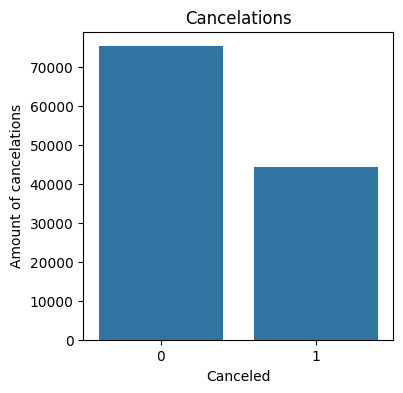

In [9]:
plt.figure(figsize=(4,4))
sns.countplot(x='is_canceled', data=df)
plt.xlabel('Canceled')
plt.ylabel('Amount of cancelations')
plt.title('Cancelations')

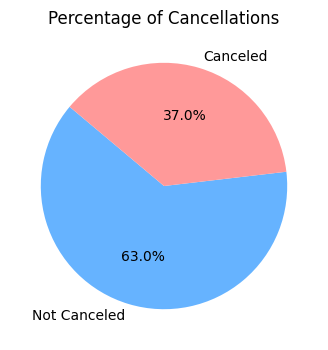

In [10]:
# Calculate the percentage of cancellations
cancellation_counts = df['is_canceled'].value_counts(normalize=True) * 100

# Plotting
plt.figure(figsize=(4, 4))
plt.pie(cancellation_counts, labels=['Not Canceled', 'Canceled'], autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#ff9999'])
plt.title('Percentage of Cancellations')
plt.show()

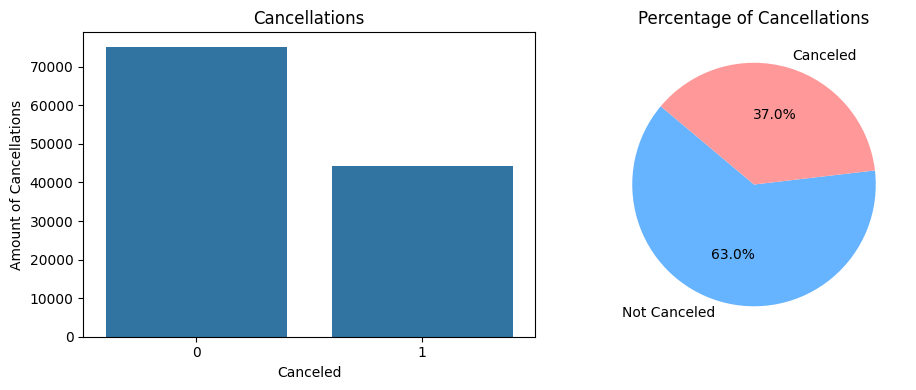

In [11]:
# Calculate the percentage of cancellations
cancellation_counts = df['is_canceled'].value_counts(normalize=True) * 100

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Count plot
sns.countplot(x='is_canceled', data=df, ax=axes[0])
axes[0].set_xlabel('Canceled')
axes[0].set_ylabel('Amount of Cancellations')
axes[0].set_title('Cancellations')

# Pie chart
axes[1].pie(cancellation_counts, labels=['Not Canceled', 'Canceled'], autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#ff9999'])
axes[1].set_title('Percentage of Cancellations')

# Display the plots
plt.tight_layout()
plt.show()

In [12]:
df.groupby(['hotel'], as_index=False)['is_canceled'].mean()

,hotel,is_canceled
0,City Hotel,0.417270
1,Resort Hotel,0.277634


<Axes: xlabel='hotel', ylabel='count'>

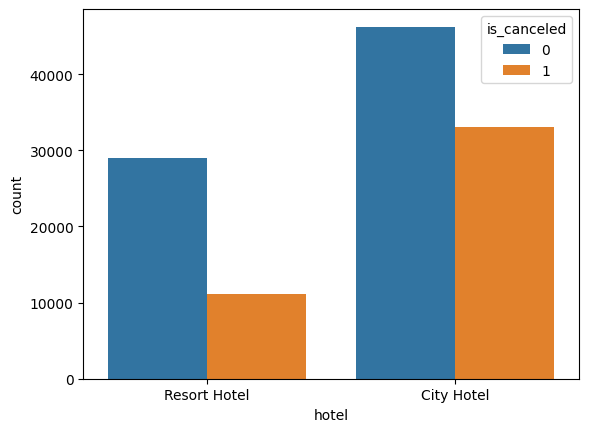

In [13]:
sns.countplot(x='hotel', hue='is_canceled', data=df)

<Axes: title={'center': 'Cancelaciones por año'}, xlabel='arrival_date_year', ylabel='count'>

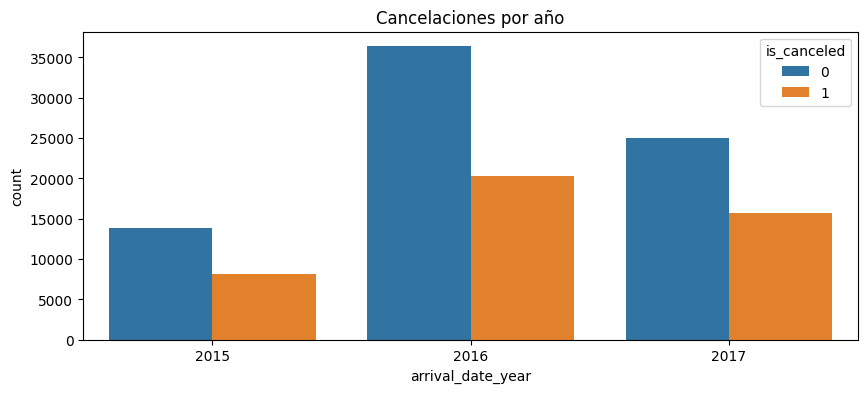

In [14]:

plt.figure(figsize=(10,4))
plt.title('Cancelaciones por año')
sns.countplot(x='arrival_date_year', hue='is_canceled', data=df)

In [15]:
df.groupby(['arrival_date_month'], as_index=False)['is_canceled'].mean()

,arrival_date_month,is_canceled
0,April,0.407972
1,August,0.377531
2,December,0.349705
3,February,0.334160
4,January,0.304773
5,July,0.374536
6,June,0.414572
7,March,0.321523
8,May,0.396658
9,November,0.312334


<Axes: title={'center': 'Cancelaciones por mes de llegada'}, xlabel='arrival_date_month', ylabel='count'>

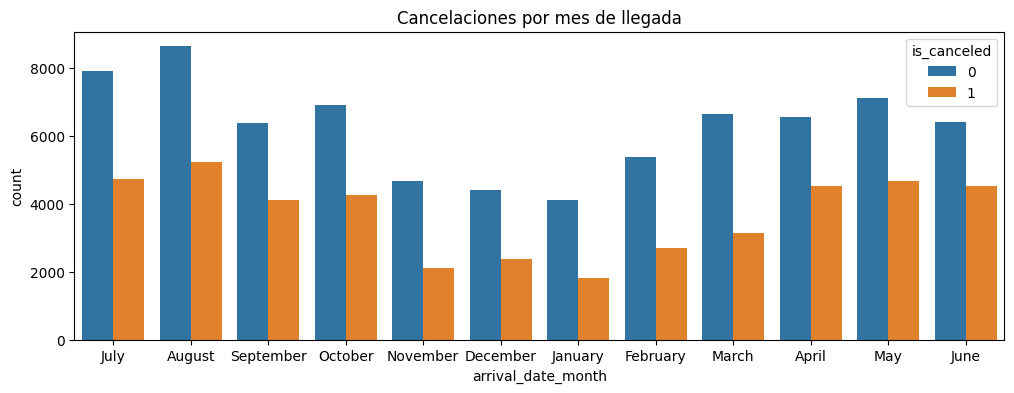

In [16]:

plt.figure(figsize=(12,4))
plt.title('Cancelaciones por mes de llegada')
sns.countplot(x='arrival_date_month', hue='is_canceled', data=df)

In [17]:
df.groupby(['stays_in_week_nights'], as_index=False)['is_canceled'].mean()

,stays_in_week_nights,is_canceled
0,0,0.250229
1,1,0.324348
2,2,0.441575
3,3,0.382110
4,4,0.365471
5,5,0.348560
6,6,0.388259
7,7,0.313897
8,8,0.335366
9,9,0.411255


<Axes: title={'center': 'Cancelaciones por cantidad de noches de estadia'}, xlabel='stays_in_week_nights', ylabel='count'>

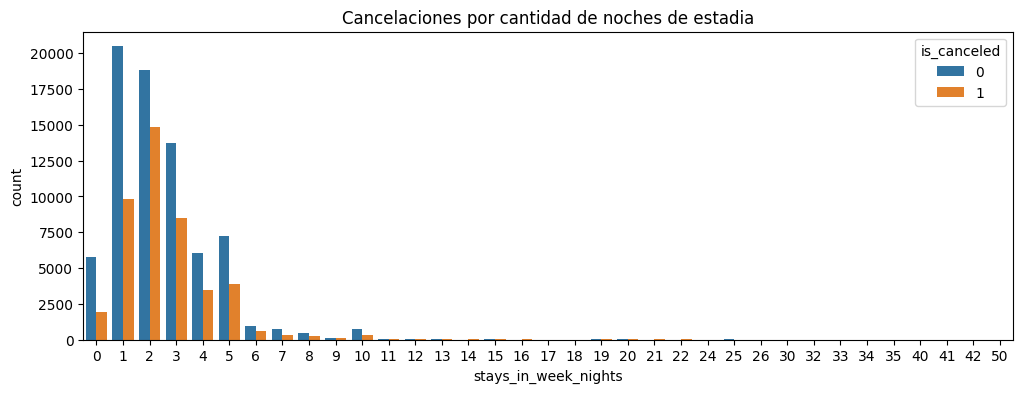

In [18]:
plt.figure(figsize=(12,4))
plt.title('Cancelaciones por cantidad de noches de estadia')
sns.countplot(x='stays_in_week_nights', hue='is_canceled', data=df)

In [19]:
df.groupby(['adults'], as_index=False)['is_canceled'].mean()

,adults,is_canceled
0,0,0.270471
1,1,0.289834
2,2,0.393153
3,3,0.346824
4,4,0.258065
5,5,1.000000
6,6,1.000000
7,10,1.000000
8,20,1.000000
9,26,1.000000


In [20]:
df[(df['adults'] > 10) & (df['is_canceled'] == 1)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
1539,Resort Hotel,1,304,2015,September,36,3,0,3,40,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,86.693382,NaN,0,Group,0.0,0,0,Canceled,2015-01-02
1587,Resort Hotel,1,333,2015,September,36,5,2,5,26,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,96.000000,NaN,0,Group,0.0,0,0,Canceled,2015-01-02
1643,Resort Hotel,1,336,2015,September,37,7,1,2,50,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,86.693382,NaN,0,Group,0.0,0,0,Canceled,2015-01-18
1752,Resort Hotel,1,340,2015,September,37,12,2,5,26,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,96.000000,NaN,0,Group,0.0,0,0,Canceled,2015-01-02
1884,Resort Hotel,1,347,2015,September,38,19,2,5,26,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,96.000000,NaN,0,Group,0.0,0,0,Canceled,2015-01-02
1917,Resort Hotel,1,349,2015,September,39,21,1,3,27,0.0,0,HB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,86.693382,NaN,0,Group,0.0,0,0,Canceled,2015-01-02
1962,Resort Hotel,1,352,2015,September,39,24,1,3,27,0.0,0,HB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,86.693382,NaN,0,Group,0.0,0,0,Canceled,2015-01-02
2003,Resort Hotel,1,354,2015,September,39,26,2,5,26,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,96.000000,NaN,0,Group,0.0,0,0,Canceled,2015-01-02
2164,Resort Hotel,1,361,2015,October,40,3,2,5,26,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,96.000000,NaN,0,Group,0.0,0,0,Canceled,2015-01-02
2173,Resort Hotel,1,338,2015,October,41,4,2,0,55,0.0,0,HB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,86.693382,NaN,0,Group,0.0,0,0,Canceled,2015-01-02


In [21]:
df.groupby(['children'], as_index=False)['is_canceled'].mean()

,children,is_canceled
0,0.00000,0.370898
1,0.10389,1.000000
2,1.00000,0.322362
3,2.00000,0.421961
4,3.00000,0.223684
5,10.00000,1.000000


In [22]:
df.groupby(['babies'], as_index=False)['is_canceled'].mean()

,babies,is_canceled
0,0,0.371874
1,1,0.183333
2,2,0.133333
3,9,0.000000
4,10,0.000000


In [23]:
df.groupby(['meal'], as_index=False)['is_canceled'].mean()

,meal,is_canceled
0,BB,0.373849
1,FB,0.598997
2,HB,0.344603
3,SC,0.372394
4,Undefined,0.244654


In [24]:
df.groupby(['country'], as_index=False)['is_canceled'].mean()

,country,is_canceled
0,ABW,0.000000
1,AGO,0.566298
2,AIA,0.000000
3,ALB,0.166667
4,AND,0.714286
...,...,...
172,VGB,1.000000
173,VNM,0.250000
174,ZAF,0.387500
175,ZMB,0.500000


In [25]:
df.country.value_counts()

country
PRT    49078
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
MRT        1
KIR        1
SDN        1
ATF        1
SLE        1
Name: count, Length: 177, dtype: int64

In [26]:
country_counts = df['country'].value_counts()
countries_below_2 = country_counts[country_counts < 2]
countries_below_2.value_counts()

count
1    30
Name: count, dtype: int64

In [27]:
df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'ETH', 

<Axes: title={'center': 'Cancelaciones por Market Segment'}, xlabel='market_segment', ylabel='count'>

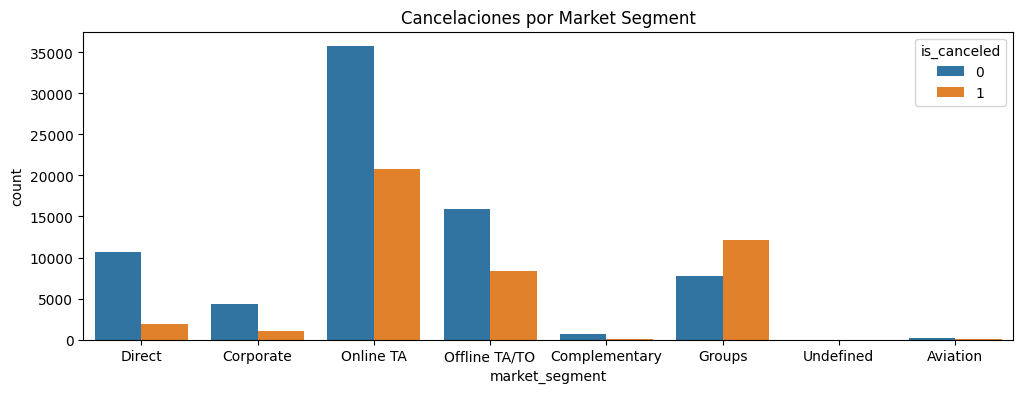

In [28]:
plt.figure(figsize=(12,4))
plt.title('Cancelaciones por Market Segment')
sns.countplot(x='market_segment', hue='is_canceled', data=df)

<Axes: title={'center': 'Cancelaciones por Distribution Channel'}, xlabel='distribution_channel', ylabel='count'>

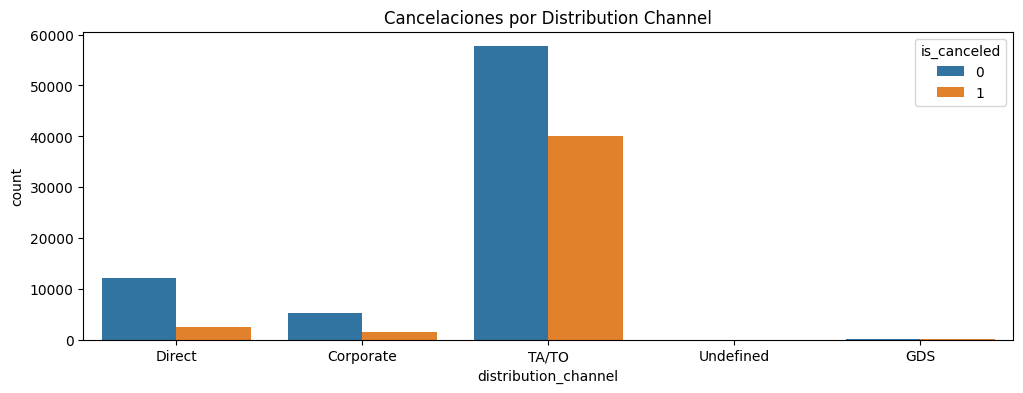

In [29]:
plt.figure(figsize=(12,4))
plt.title('Cancelaciones por Distribution Channel')
sns.countplot(x='distribution_channel', hue='is_canceled', data=df)

In [30]:
df.groupby(['distribution_channel'], as_index=False)['is_canceled'].agg(['count', 'mean'])

,distribution_channel,count,mean
0,Corporate,6677,0.220758
1,Direct,14645,0.174599
2,GDS,193,0.191710
3,TA/TO,97870,0.410259
4,Undefined,5,0.800000


<Axes: title={'center': 'Cancelaciones por Clientes Repetidos'}, xlabel='is_repeated_guest', ylabel='count'>

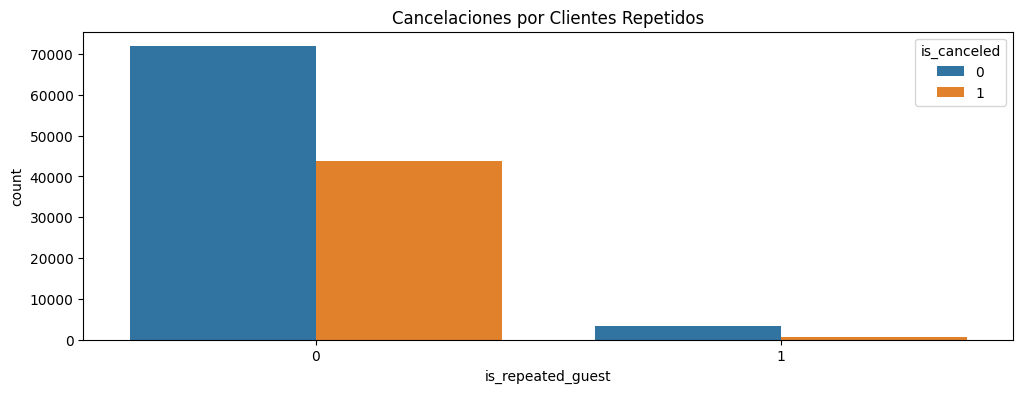

In [31]:
plt.figure(figsize=(12,4))
plt.title('Cancelaciones por Clientes Repetidos')
sns.countplot(x='is_repeated_guest', hue='is_canceled', data=df)

<Axes: title={'center': 'Cancelaciones por Clientes Repetidos'}, xlabel='previous_cancellations', ylabel='count'>

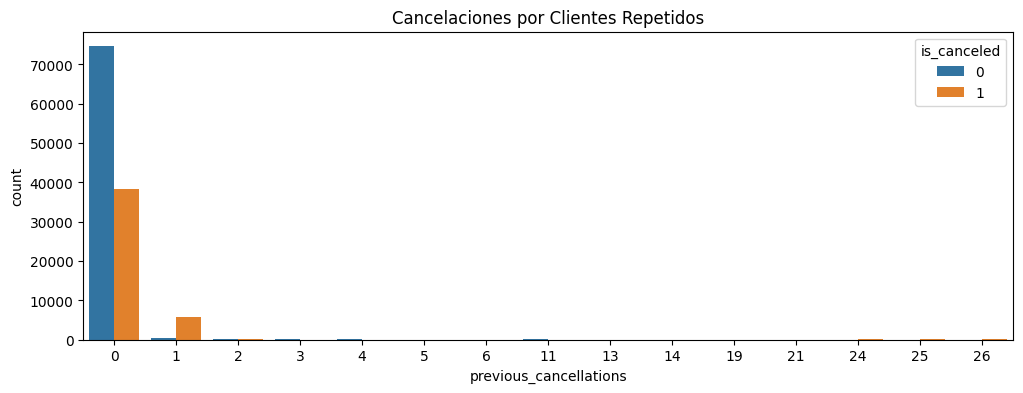

In [32]:
plt.figure(figsize=(12,4))
plt.title('Cancelaciones por Clientes Repetidos')
sns.countplot(x='previous_cancellations', hue='is_canceled', data=df)




In [33]:
df.groupby(['previous_bookings_not_canceled'], as_index=False)['is_canceled'].mean()

,previous_bookings_not_canceled,is_canceled
0,0,0.380271
1,1,0.051232
2,2,0.055172
3,3,0.051051
4,4,0.052402
...,...,...
68,68,0.000000
69,69,0.000000
70,70,0.000000
71,71,0.000000


In [34]:
df['previous_bookings_not_canceled'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 19, 26, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72])

In [35]:
df.groupby(['reserved_room_type'], as_index=False)['is_canceled'].agg(['count','mean'])

,reserved_room_type,count,mean
0,A,85994,0.391074
1,B,1118,0.329159
2,C,932,0.330472
3,D,19201,0.317796
4,E,6535,0.292884
5,F,2897,0.303763
6,G,2094,0.364374
7,H,601,0.407654
8,L,6,0.333333
9,P,12,1.000000


In [36]:
df.groupby(['assigned_room_type'], as_index=False)['is_canceled'].agg(['count','mean'])


,assigned_room_type,count,mean
0,A,74053,0.444925
1,B,2163,0.236708
2,C,2375,0.187789
3,D,25322,0.251244
4,E,7806,0.252114
5,F,3751,0.247134
6,G,2553,0.305523
7,H,712,0.352528
8,I,363,0.013774
9,K,279,0.043011


In [37]:
df['different_room'] = df['reserved_room_type'] != df['assigned_room_type']
df['different_room'] = df['different_room'].apply(lambda x: 1 if x == True else 0)

In [38]:
df[['reserved_room_type', 'assigned_room_type', 'different_room']]

,reserved_room_type,assigned_room_type,different_room
0,C,C,0
1,C,C,0
2,A,C,1
3,A,A,0
4,A,A,0
...,...,...,...
119385,A,A,0
119386,E,E,0
119387,D,D,0
119388,A,A,0


In [39]:
df_rooms = df[df['different_room'] == 1]

df_rooms.groupby(['reserved_room_type', 'assigned_room_type']).size()

reserved_room_type  assigned_room_type
A                   B                     1123
                    C                     1447
                    D                     7548
                    E                     1156
                    F                      417
                                          ... 
L                   A                        1
                    B                        1
                    C                        1
                    F                        1
                    H                        1
Length: 65, dtype: int64

In [40]:
df_rooms.shape

(14917, 33)

<Axes: title={'center': 'Cancelaciones por cambio de Habitaciones'}, xlabel='different_room', ylabel='count'>

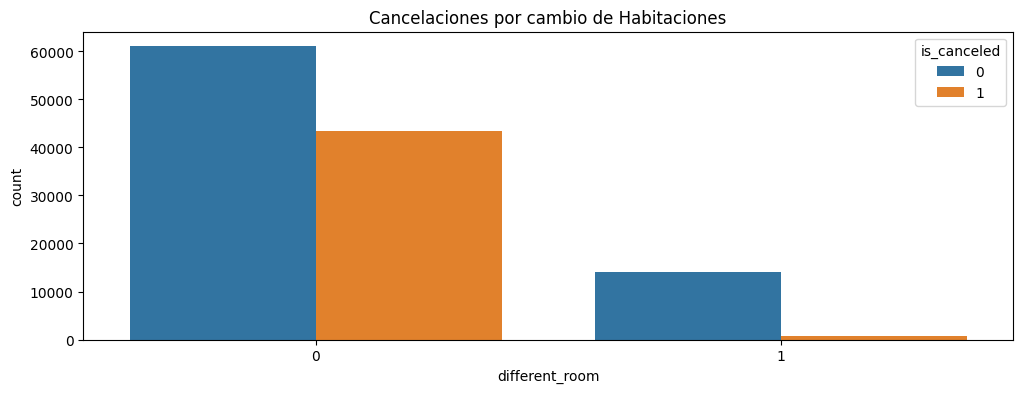

In [41]:
plt.figure(figsize=(12,4))
plt.title('Cancelaciones por cambio de Habitaciones')
sns.countplot(x='different_room', hue='is_canceled', data=df)

In [42]:
df.groupby(['booking_changes'], as_index=False)['is_canceled'].agg(['count','mean'])

,booking_changes,count,mean
0,0,101314,0.408542
1,1,12701,0.142272
2,2,3805,0.201314
3,3,927,0.155340
4,4,376,0.178191
5,5,118,0.169492
6,6,63,0.285714
7,7,31,0.096774
8,8,17,0.235294
9,9,8,0.125000


In [43]:
df.groupby(['deposit_type'], as_index=False)['is_canceled'].agg(['count','mean'])

,deposit_type,count,mean
0,No Deposit,104641,0.283770
1,Non Refund,14587,0.993624
2,Refundable,162,0.222222


In [44]:
df.groupby(['agent'], as_index=False)['is_canceled'].agg(['count','mean']).sort_values(by='count', ascending=False)

,agent,count,mean
8,9.000000,31961,0.415006
75,86.693382,16340,0.246634
174,240.000000,13922,0.393909
0,1.000000,7191,0.734251
13,14.000000,3640,0.179121
...,...,...,...
291,431.000000,1,0.000000
292,432.000000,1,0.000000
293,433.000000,1,0.000000
299,444.000000,1,0.000000


In [45]:
df.groupby(['days_in_waiting_list'], as_index=False)['is_canceled'].agg(['count','mean'])

,days_in_waiting_list,count,mean
0,0,115692,0.361866
1,1,12,0.250000
2,2,5,0.200000
3,3,59,1.000000
4,4,25,0.320000
...,...,...,...
123,236,35,0.171429
124,259,10,0.000000
125,330,15,0.066667
126,379,15,0.600000


In [46]:
df.groupby(['customer_type'], as_index=False)['is_canceled'].agg(['count','mean'])

,customer_type,count,mean
0,Contract,4076,0.309617
1,Group,577,0.102253
2,Transient,89613,0.407463
3,Transient-Party,25124,0.254299


<Axes: title={'center': 'Cancelaciones por Tipo de Clientes'}, xlabel='customer_type', ylabel='count'>

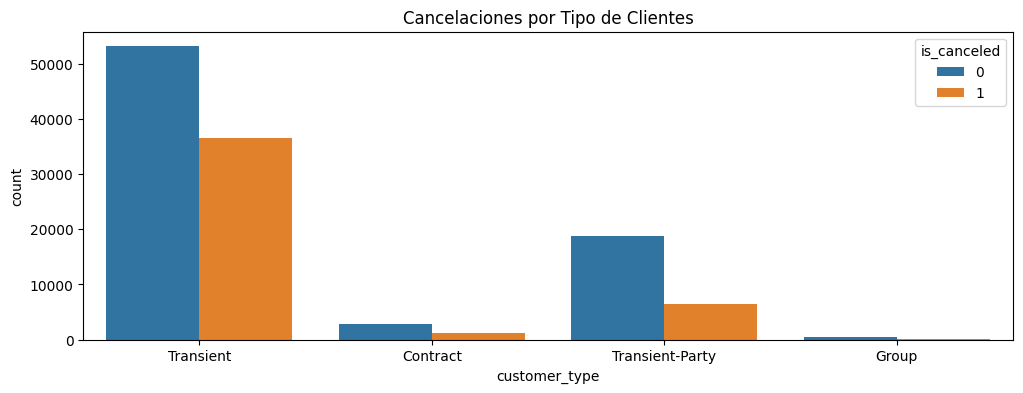

In [47]:
plt.figure(figsize=(12,4))
plt.title('Cancelaciones por Tipo de Clientes')
sns.countplot(x='customer_type', hue='is_canceled', data=df)

<Axes: title={'center': 'Cancelaciones por Tipo de Clientes'}, xlabel='adr', ylabel='Count'>

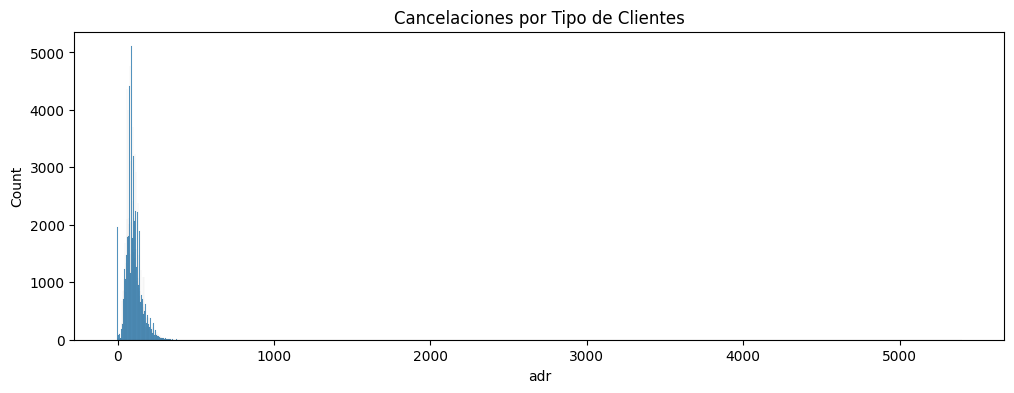

In [48]:
plt.figure(figsize=(12,4))
plt.title('Cancelaciones por Tipo de Clientes')
sns.histplot(x='adr', data=df)

In [49]:
df['adr'].nlargest(10)

48515     5400.00
111403     510.00
15083      508.00
103912     451.50
13142      450.00
13391      437.00
39155      426.25
39568      402.00
39118      397.38
13323      392.00
Name: adr, dtype: float64

In [50]:
df[df['adr'] > 5000]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,different_room
48515,City Hotel,1,35,2016,March,13,25,0,1,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,1,Non Refund,12.0,NaN,0,Transient,5400.0,0,0,Canceled,2016-02-19,0


In [51]:
df.drop(48515,axis=0,inplace=True)

In [52]:
df['adr'].describe()

count    119389.000000
mean        101.786744
std          48.153554
min          -6.380000
25%          69.290000
50%          94.560000
75%         126.000000
max         510.000000
Name: adr, dtype: float64

In [53]:
df['adr'] = df['adr'].abs()

In [54]:
df['adr'].describe()

count    119389.000000
mean        101.786851
std          48.153328
min           0.000000
25%          69.290000
50%          94.560000
75%         126.000000
max         510.000000
Name: adr, dtype: float64

In [55]:
df[df['adr'] == 0].shape

(1959, 33)

In [56]:
df[df['adr'] == 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,different_room
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,86.693382,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,86.693382,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
125,Resort Hotel,0,32,2015,July,27,4,0,1,4,0.0,0,FB,PRT,Complementary,Direct,0,0,0,H,H,2,No Deposit,86.693382,NaN,0,Transient,0.0,0,1,Check-Out,2015-07-05,0
167,Resort Hotel,0,111,2015,July,28,6,0,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,H,0,No Deposit,240.000000,NaN,0,Transient,0.0,0,2,Check-Out,2015-07-06,1
168,Resort Hotel,0,0,2015,July,28,6,0,0,1,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,H,0,No Deposit,250.000000,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-06,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118631,City Hotel,0,78,2017,August,34,23,0,0,1,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,K,7,No Deposit,98.000000,NaN,0,Transient-Party,0.0,0,0,Check-Out,2017-08-23,1
118762,City Hotel,0,1,2017,August,34,24,0,1,2,1.0,0,BB,PRT,Complementary,Direct,0,0,0,A,D,1,No Deposit,86.693382,NaN,0,Transient,0.0,0,3,Check-Out,2017-08-25,1
118963,City Hotel,0,1,2017,August,35,27,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,86.693382,NaN,0,Transient,0.0,0,0,Check-Out,2017-08-27,0
119102,City Hotel,0,518,2017,August,34,26,2,1,1,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,229.000000,NaN,0,Transient-Party,0.0,0,0,Check-Out,2017-08-29,0


In [57]:
df.groupby(['required_car_parking_spaces'], as_index=False)['is_canceled'].agg(['count','mean'])

,required_car_parking_spaces,count,mean
0,0,111973,0.394943
1,1,7383,0.000000
2,2,28,0.000000
3,3,3,0.000000
4,8,2,0.000000


In [58]:
df.groupby(['total_of_special_requests'], as_index=False)['is_canceled'].agg(['count','mean'])

,total_of_special_requests,count,mean
0,0,70317,0.477196
1,1,33226,0.220249
2,2,12969,0.220989
3,3,2497,0.178614
4,4,340,0.105882
5,5,40,0.050000


In [59]:
df.groupby(['reservation_status'], as_index=False)['is_canceled'].agg(['count','mean'])

,reservation_status,count,mean
0,Canceled,43016,1.0
1,Check-Out,75166,0.0
2,No-Show,1207,1.0


In [60]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'different_room'],
      dtype='object')

# Feature Engineering & Column Transformation

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119389 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119389 non-null  object 
 1   is_canceled                     119389 non-null  int64  
 2   lead_time                       119389 non-null  int64  
 3   arrival_date_year               119389 non-null  int64  
 4   arrival_date_month              119389 non-null  object 
 5   arrival_date_week_number        119389 non-null  int64  
 6   arrival_date_day_of_month       119389 non-null  int64  
 7   stays_in_weekend_nights         119389 non-null  int64  
 8   stays_in_week_nights            119389 non-null  int64  
 9   adults                          119389 non-null  int64  
 10  children                        119389 non-null  float64
 11  babies                          119389 non-null  int64  
 12  meal                 

1) Leadtime

In [62]:
df['lead_time'].describe()

count    119389.000000
mean        104.011994
std         106.863358
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64

In [63]:
#Eliminamos los outliers de Lead Time mayor a 550
df = df[df['lead_time'] < 550]

In [64]:
df['lead_time'].describe()

count    119123.000000
mean        102.910857
std         104.400641
min           0.000000
25%          18.000000
50%          69.000000
75%         159.000000
max         545.000000
Name: lead_time, dtype: float64

In [65]:
df['lead_time'] = pd.cut(df['lead_time'], bins=[0, 150, 300, 450, 600], labels=[1, 2, 3, 4])
# Convertimos los valores 0 a 1, para luego poder pasarlos a Int.
df['lead_time'] = df['lead_time'].cat.add_categories([5]).fillna(5)
df['lead_time'] = df['lead_time'].astype(int)

2) arrival_date_month convertirlo a numericas

In [66]:
month_mapping = {'January' : '1',
        'February' : '2',
        'March' : '3',
        'April' : '4',
        'May' : '5',
        'June' : '6',
        'July' : '7',
        'August' : '8',
        'September' : '9', 
        'October' : '10',
        'November' : '11',
        'December' : '12'}

df['arrival_date_month'] = df['arrival_date_month'].map(month_mapping)
df['arrival_date_month'] = df['arrival_date_month'].astype(int)

3) Total Stays

In [67]:
df['Total_stay_days'] = (df['stays_in_weekend_nights'] + df['stays_in_week_nights']).astype(int)

In [68]:
df['Total_stay_days'].describe()

count    119123.000000
mean          3.430605
std           2.558431
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          69.000000
Name: Total_stay_days, dtype: float64

In [69]:
df[df['Total_stay_days']==0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,different_room,Total_stay_days
0,Resort Hotel,0,3,2015,7,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,86.693382,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,0
167,Resort Hotel,0,1,2015,7,28,6,0,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,H,0,No Deposit,240.000000,NaN,0,Transient,0.0,0,2,Check-Out,2015-07-06,1,0
168,Resort Hotel,0,5,2015,7,28,6,0,0,1,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,H,0,No Deposit,250.000000,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-06,1,0
196,Resort Hotel,0,1,2015,7,28,7,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,86.693382,NaN,0,Transient,0.0,0,1,Check-Out,2015-07-07,0,0
197,Resort Hotel,0,1,2015,7,28,7,0,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,E,0,No Deposit,240.000000,NaN,0,Transient,0.0,0,1,Check-Out,2015-07-07,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115483,City Hotel,0,1,2017,7,27,6,0,0,1,0.0,0,SC,FRA,Direct,Direct,0,0,0,A,A,0,No Deposit,14.000000,NaN,0,Transient-Party,0.0,0,0,Check-Out,2017-07-06,0,0
117701,City Hotel,0,5,2017,8,32,8,0,0,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,1,0,0,A,A,0,No Deposit,262.000000,NaN,0,Transient,0.0,0,0,Check-Out,2017-08-08,0,0
118029,City Hotel,0,5,2017,8,33,14,0,0,2,0.0,0,BB,PRT,Direct,Direct,1,0,0,A,A,0,No Deposit,86.693382,NaN,0,Transient,0.0,0,0,Check-Out,2017-08-14,0,0
118631,City Hotel,0,1,2017,8,34,23,0,0,1,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,K,7,No Deposit,98.000000,NaN,0,Transient-Party,0.0,0,0,Check-Out,2017-08-23,1,0


In [70]:
# Nos quedamos con los registros que tienen estadia mayor a 0
df = df[df['Total_stay_days'] > 0]

4) Family Members = 'adults' + 'children' + 'babies'

In [71]:
df['Total_fam_members'] = (df['adults'] + df['children'] + df['babies']).astype(int)



In [72]:
df[df['Total_fam_members'] == 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,different_room,Total_stay_days,Total_fam_members
2224,Resort Hotel,0,1,2015,10,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,86.693382,174.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06,1,3,0
3181,Resort Hotel,0,1,2015,11,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,38.000000,NaN,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23,1,3,0
3684,Resort Hotel,0,2,2015,12,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,308.000000,NaN,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04,0,5,0
3708,Resort Hotel,0,2,2015,12,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,308.000000,NaN,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05,1,6,0
31765,Resort Hotel,0,1,2016,12,53,27,2,8,0,0.0,0,BB,PRT,Direct,Direct,0,0,0,D,D,3,No Deposit,86.693382,NaN,0,Transient,28.00,1,0,Check-Out,2017-01-06,0,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,1,2017,6,26,27,0,3,0,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,7.000000,NaN,0,Transient,100.80,0,0,Check-Out,2017-06-30,0,3,0
115091,City Hotel,0,1,2017,6,26,30,0,1,0,0.0,0,SC,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,86.693382,NaN,0,Transient,0.00,1,1,Check-Out,2017-07-01,1,1,0
116251,City Hotel,0,1,2017,7,28,15,1,1,0,0.0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,425.000000,NaN,0,Transient,73.80,0,0,Check-Out,2017-07-17,1,2,0
116534,City Hotel,0,1,2017,7,28,15,2,5,0,0.0,0,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,9.000000,NaN,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22,1,7,0


In [73]:
#Nos quedamos con los registros que tienen miembros de la familia mayor a 0
df = df[df['Total_fam_members'] > 0]

In [74]:
df['Total_fam_members'] = pd.cut(df['Total_fam_members'], bins=[0, 1, 2, 5, 10, 100], labels=['1', '2', '3', '4', '5'])

In [75]:
df['Total_fam_members'] = df['Total_fam_members'].astype(int)

5) Counrties to Continents

In [76]:
continent_mapping = {
    'PRT': 1, 'GBR': 1, 'ESP': 1, 'IRL': 1, 'FRA': 1, 'ROU': 1, 'NOR': 1, 'DEU': 1, 'BEL': 1, 'CHE': 1, 'GRC': 1,
    'ITA': 1, 'NLD': 1, 'DNK': 1, 'RUS': 1, 'SWE': 1, 'EST': 1, 'CZE': 1, 'FIN': 1, 'LUX': 1, 'SVN': 1, 'ALB': 1,
    'AUT': 1, 'BLR': 1, 'LTU': 1, 'HUN': 1, 'SRB': 1, 'UKR': 1, 'SMR': 1, 'LVA': 1, 'PRI': 1, 'AND': 1, 'GIB': 1,
    'URY': 1, 'JEY': 1, 'CYP': 1, 'SVK': 1, 'MKD': 1, 'ARM': 1, 'BGR': 1, 'BIH': 1, 'MNE': 1, 'ISL': 1, 'MDG': 1,
    'MLT': 1, 'LIE': 1, 'MCO': 1, 'VAT': 1, 'BHS': 2, 'USA': 2, 'CAN': 2, 'MEX': 2, 'ARG': 2, 'BRA': 2, 'CHL': 2,
    'COL': 2, 'PER': 2, 'PRI': 2, 'DOM': 2, 'CRI': 2, 'NIC': 2, 'HND': 2, 'SLV': 2, 'GTM': 2, 'CUB': 2, 'JAM': 2,
    'PAN': 2, 'BOL': 2, 'PRY': 2, 'VEN': 2, 'GUY': 2, 'SUR': 2, 'ECU': 2, 'BLZ': 2, 'AUS': 3, 'NZL': 3, 'FJI': 3,
    'PNG': 3, 'IND': 4, 'CHN': 4, 'PAK': 4, 'IDN': 4, 'JPN': 4, 'PHL': 4, 'VNM': 4, 'MYS': 4, 'THA': 4, 'KOR': 4,
    'SGP': 4, 'LKA': 4, 'BGD': 4, 'NPL': 4, 'MMR': 4, 'MNG': 4, 'BTN': 4, 'KHM': 4, 'LAO': 4, 'TMP': 4, 'TWN': 4,
    'HKG': 4, 'MAC': 4, 'MDV': 4, 'TUR': 5, 'IRN': 5, 'IRQ': 5, 'SYR': 5, 'SAU': 5, 'YEM': 5, 'ARE': 5, 'OMN': 5,
    'KWT': 5, 'QAT': 5, 'BHR': 5, 'LBN': 5, 'JOR': 5, 'ISR': 5, 'PSE': 5, 'GEO': 5, 'ARM': 5, 'AZE': 5, 'CYP': 5,
    'TJK': 5, 'KGZ': 5, 'UZB': 5, 'TKM': 5, 'AFG': 5, 'ZAF': 6, 'NGA': 6, 'KEN': 6, 'TZA': 6, 'GHA': 6, 'ETH': 6,
    'UGA': 6, 'ZWE': 6, 'MOZ': 6, 'ZMB': 6, 'MWI': 6, 'AGO': 6, 'BWA': 6, 'NAM': 6, 'ZAF': 6, 'MDG': 6, 'BDI': 6,
    'CMR': 6, 'COG': 6, 'DJI': 6, 'ERI': 6, 'GAB': 6, 'GNB': 6, 'GNQ': 6, 'LSO': 6, 'MAR': 6, 'MRT': 6, 'BEN': 6,
    'TGO': 6, 'SEN': 6, 'SLE': 6, 'SOM': 6, 'SSD': 6, 'SDN': 6, 'RWA': 6, 'TCD': 6, 'BFA': 6, 'CIV': 6, 'GIN': 6,
    'LBR': 6, 'MLI': 6, 'NER': 6, 'NGA': 6, 'SEN': 6, 'TCD': 6, 'TGO': 6, 'TUN': 6, 'EGY': 6, 'LBY': 6, 'DZA': 6,
    'MAR': 6, 'SDN': 6, 'SOM': 6, 'DJI': 6, 'COM': 6, 'CPV': 6, 'GNQ': 6, 'STP': 6, 'ETH': 6, 'SWZ': 6, 'SYC': 6,
    'MUS': 6, 'REU': 6, 'SHN': 6, 'SUR': 6, 'ATF': 7, 'AIA': 7, 'BMU': 7, 'IOT': 7, 'MSR': 7, 'VGB': 7, 'VIR': 7
}

# Create a new column 'continent' based on the mapping
df['continent'] = df['country'].map(continent_mapping)

In [77]:
# Find the most frequent value in the 'continent' column
most_frequent = df['continent'].mode()[0]

# Fill NaN values with the most frequent value
df['continent'] = df['continent'].fillna(most_frequent)
df['continent'] = df['continent'].astype(int)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118299 entries, 2 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118299 non-null  object 
 1   is_canceled                     118299 non-null  int64  
 2   lead_time                       118299 non-null  int64  
 3   arrival_date_year               118299 non-null  int64  
 4   arrival_date_month              118299 non-null  int64  
 5   arrival_date_week_number        118299 non-null  int64  
 6   arrival_date_day_of_month       118299 non-null  int64  
 7   stays_in_weekend_nights         118299 non-null  int64  
 8   stays_in_week_nights            118299 non-null  int64  
 9   adults                          118299 non-null  int64  
 10  children                        118299 non-null  float64
 11  babies                          118299 non-null  int64  
 12  meal                 

In [79]:
df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [80]:
df['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [81]:
df['is_repeated_guest'].unique()

array([0, 1])

In [82]:
df['previous_cancellations'].unique()

array([ 0,  1,  2,  3, 26, 25, 14,  4, 24, 19,  5, 21,  6, 13, 11])

6) Previous Cancelations

In [83]:
df['previous_cancellations'] = pd.cut(df['previous_cancellations'], bins=[0, 10, 20, 30], labels=['1', '2', '3'])

In [84]:
df['previous_cancellations'].unique()

[NaN, '1', '3', '2']
Categories (3, object): ['1' < '2' < '3']

In [85]:
# Replace actual NaN values with '1'
df['previous_cancellations'] = df['previous_cancellations'].fillna('1')

In [86]:
df['previous_cancellations'].unique()

['1', '3', '2']
Categories (3, object): ['1' < '2' < '3']

In [87]:
df['previous_cancellations'] = df['previous_cancellations'].astype(int)

In [88]:
df['previous_bookings_not_canceled'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 19, 26, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72])

7) Previous Bookings not Canceled

In [89]:
df['previous_bookings_not_canceled'] = pd.cut(df['previous_bookings_not_canceled'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80], labels=['1', '2', '3', '4', '5', '6', '7', '8'])
df['previous_bookings_not_canceled'] = df['previous_bookings_not_canceled'].fillna('1')
df['previous_bookings_not_canceled'] = df['previous_bookings_not_canceled'].astype(int)

In [90]:
df['booking_changes'].unique()

array([ 0,  1,  2,  3,  5,  4, 17,  6,  8,  7, 10, 16,  9, 13, 12, 14, 15,
       18, 11])

In [91]:
df['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [92]:
df['agent'].unique()

array([ 86.69338185, 304.        , 240.        , 303.        ,
        15.        , 241.        ,   8.        , 250.        ,
       115.        ,   5.        , 175.        , 134.        ,
       156.        , 243.        , 242.        ,   3.        ,
       105.        ,  40.        , 147.        , 306.        ,
       184.        ,  96.        ,   2.        , 127.        ,
        95.        , 146.        ,   9.        , 177.        ,
         6.        , 143.        , 244.        , 149.        ,
       167.        , 300.        , 171.        , 305.        ,
        67.        , 196.        , 152.        , 142.        ,
       261.        , 104.        ,  36.        ,  26.        ,
        29.        , 258.        , 110.        ,  71.        ,
       181.        ,  88.        , 251.        , 275.        ,
        69.        , 248.        , 208.        , 256.        ,
       314.        , 126.        , 281.        , 273.        ,
       253.        , 185.        , 330.        , 334.  

8) Days in waiting list

In [93]:
df['days_in_waiting_list'].unique()

array([  0,  50,  47,  65, 122,  75, 101, 150, 125,  14,  60,  34, 100,
        22, 121,  61,  39,   5,   1,   8, 107,  43,  52,   2,  11, 142,
       116,  13,  44,  97,  83,   4, 113,  18,  20, 185,  93, 109,   6,
        37, 105, 154,  64,  99,  38,  48,  33,  77,  21,  80,  59,  40,
        58,  89,  53,  49,  69,  87,  91,  57, 111,  79,  98,  85,  63,
        15,   3,  41, 224,  31,  56, 187, 176,  71,  55,  96, 236, 259,
       207, 215, 160, 120,  30,  32,  27,  62,  24, 108, 147, 379,  70,
        35, 178, 330, 223, 174, 162, 391,  68, 193,  10,  76,  16,  28,
         9, 165,  17,  25,  46,   7,  84, 175, 183,  23, 117,  12,  54,
        26,  73,  45,  19,  42,  72,  81,  74, 167,  36])

In [94]:
# Define custom bins
bins = [-1, 0, 20, 40, 60, 80, 100, 150, 200, 250, 400]

# Use pd.cut to bin the 'days_in_waiting_list' column with custom bins
df['days_in_waiting_list'] = pd.cut(df['days_in_waiting_list'], bins=bins, labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])


In [95]:
df['days_in_waiting_list'].unique()

[1, 4, 5, 7, 2, 3, 6, 8, 9, 10]
Categories (10, int64): [1 < 2 < 3 < 4 ... 7 < 8 < 9 < 10]

In [96]:
df['days_in_waiting_list'] = df['days_in_waiting_list'].astype(int)

In [97]:
df['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

8) Total pay

In [98]:
df['Total_pay'] = (df['stays_in_weekend_nights'] * df['adr'] + df['stays_in_week_nights'] * df['adr']).astype(int)

In [99]:
df['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

# Dropping unnecessary colums

In [100]:
# We will drop the company column as it has 94.3% missing values and the arrival_date_day_of_month as it is unecessary
df.drop(['arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'country', 'company', 'adr', 'reservation_status_date'], axis=1, inplace=True)

# We will drop arrival_date_week_number as is unecessary
#df.drop('arrival_date_week_number',inplace=True,axis=1)

<Axes: >

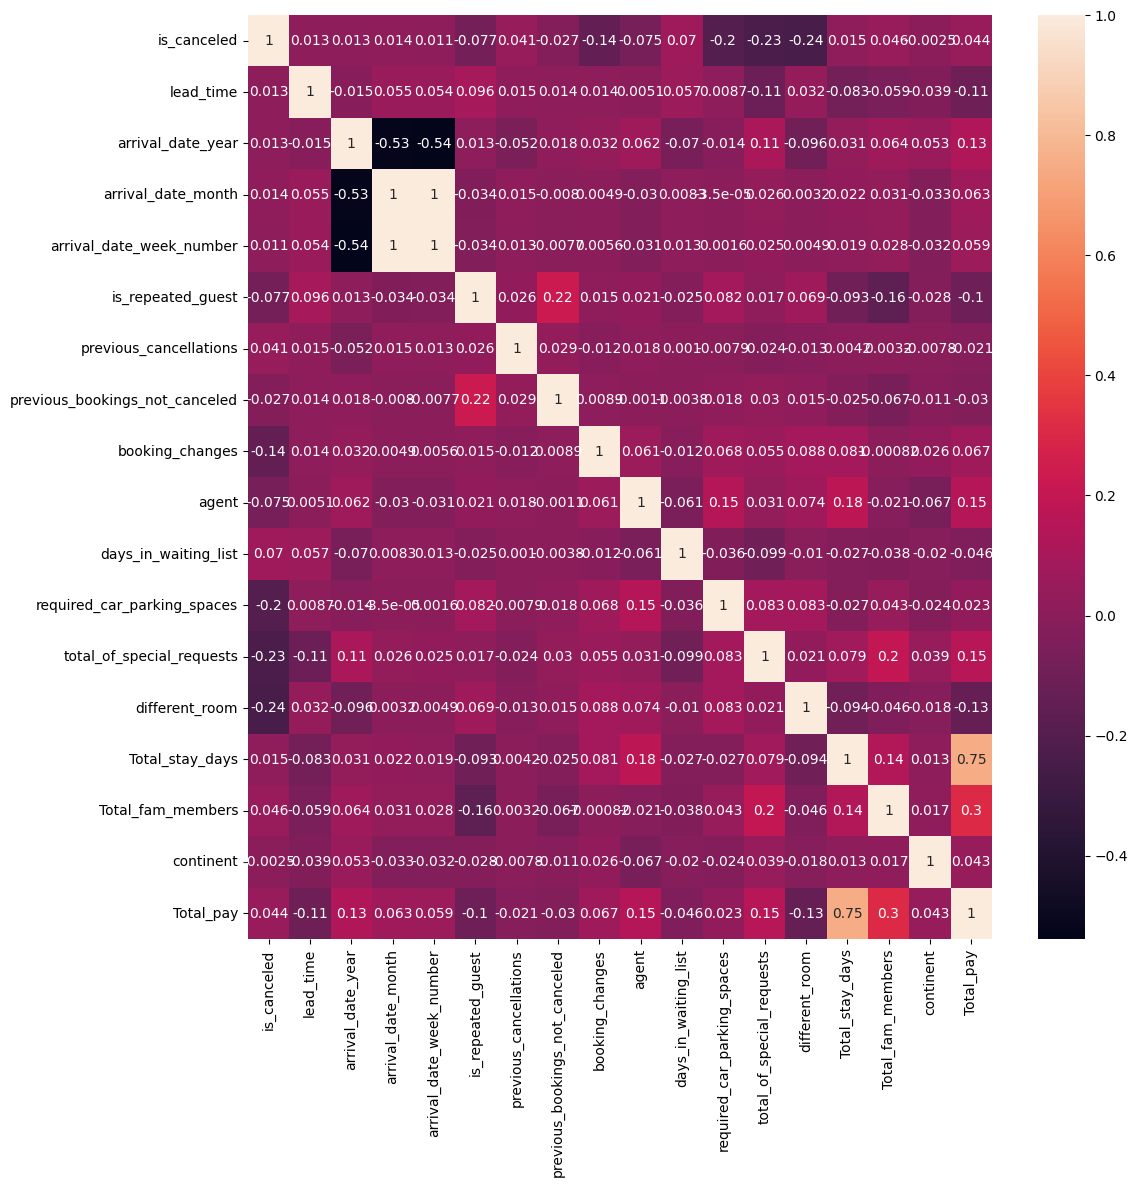

In [101]:
plt.figure(figsize=(12,12))
corr = df.corr(method='pearson',numeric_only=True) 
sns.heatmap(corr, annot = True) 

In [102]:
# Add a new column with the index plus "ID"
df['ID'] = "ID" + (df.index + 1).astype(str)

# ML

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118299 entries, 2 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118299 non-null  object 
 1   is_canceled                     118299 non-null  int64  
 2   lead_time                       118299 non-null  int64  
 3   arrival_date_year               118299 non-null  int64  
 4   arrival_date_month              118299 non-null  int64  
 5   arrival_date_week_number        118299 non-null  int64  
 6   meal                            118299 non-null  object 
 7   market_segment                  118299 non-null  object 
 8   distribution_channel            118299 non-null  object 
 9   is_repeated_guest               118299 non-null  int64  
 10  previous_cancellations          118299 non-null  int64  
 11  previous_bookings_not_canceled  118299 non-null  int64  
 12  reserved_room_type   

In [104]:
# Define the columns for each transformer
num_cols = [
    'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number',
    'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled',
    'booking_changes', 'agent', 'days_in_waiting_list', 'required_car_parking_spaces',
    'total_of_special_requests', 'different_room', 'Total_pay', 'Total_stay_days',
    'Total_fam_members', 'continent'
]

ohe_cols = [
    'hotel', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type',
    'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status'
]

# Split the data
X = df.drop(['is_canceled'], axis=1)
y = df['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11, test_size=0.2)

# Define the pipelines
num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scale', MinMaxScaler())
])

ohe_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine the pipelines using ColumnTransformer
col_transformer = ColumnTransformer(transformers=[
    ('num', num_pipeline, num_cols),
    ('ohe', ohe_pipeline, ohe_cols)
], remainder='drop', n_jobs=-1)

In [105]:
# Define the RandomForestClassifier with a name
rfc = Pipeline(steps=[
    ('classifier', RandomForestClassifier(random_state=11))
])

# Define the parameter grid
param_grid = {
    'classifier__n_estimators': [100, 150, 200],
    'classifier__min_samples_split': [5, 10, 15],
    'classifier__max_depth': [8, 9, 10, 15, 20],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__criterion': ['gini', 'entropy'],
}

# Set up GridSearchCV with StratifiedKFold
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5), n_jobs=-1)


In [106]:
# Create the final pipeline
pipefinalrfc = make_pipeline(col_transformer, CV_rfc)

# Fit the pipeline on the training data
pipefinalrfc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['lead_time',
                                                   'arrival_date_year',
                                                   'arrival_date_month',
                                                   'arrival_date_week_number',
                                                   'is_repeated_guest',
                                                   'previous_cancellations',
                                                   'previous_bookings_not_canceled',
                                                   'booking_changes', 'agent',
                                                   'days_in_...
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=Pipeline(steps=[('classifier',
                                                         RandomForestClassifier(random_state=11))]),
                              n_jobs=-1,
                              param_grid={'classifier__criterion': ['gini',
                                                                    'entropy'],
                                          'classifier__max_depth': [8, 9, 10,
                                                                    15, 20],
                                          'classifier__min_samples_leaf': [1, 2,
                                                                           4],
                                          'classifier__min_samples_split': [5,
                                                                            10,
                                                                            15],
                                          'classifier__n_estimators': [100, 150,
                                                                       200]}))])

In [107]:
# Print the best parameters and best score
print("Best Parameters:", CV_rfc.best_params_)
print("Best Score:", CV_rfc.best_score_)

Best Parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 8, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Best Score: 1.0


In [108]:
# Define the DecisionTreeClassifier with a name
dtc = Pipeline(steps=[
    ('classifier', DecisionTreeClassifier(random_state=11))
])

# Define the parameter grid
param_grid = {
    'classifier__max_depth': [None, 10, 20, 30, 40, 50],
    'classifier__min_samples_split': [2, 10, 20],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__criterion': ['gini', 'entropy'],
}

# Set up GridSearchCV with StratifiedKFold
CV_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5), n_jobs=-1)

In [109]:
# Create the final pipeline
pipefinaldtc = make_pipeline(col_transformer, CV_dtc)

# Fit the pipeline on the training data
pipefinaldtc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['lead_time',
                                                   'arrival_date_year',
                                                   'arrival_date_month',
                                                   'arrival_date_week_number',
                                                   'is_repeated_guest',
                                                   'previous_cancellations',
                                                   'previous_bookings_not_canceled',
                                                   'booking_changes', 'agent',
                                                   'days_in_...
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=Pipeline(steps=[('classifier',
                                                         DecisionTreeClassifier(random_state=11))]),
                              n_jobs=-1,
                              param_grid={'classifier__criterion': ['gini',
                                                                    'entropy'],
                                          'classifier__max_depth': [None, 10,
                                                                    20, 30, 40,
                                                                    50],
                                          'classifier__min_samples_leaf': [1, 2,
                                                                           4],
                                          'classifier__min_samples_split': [2,
                                                                            10,
                                                                            20]}))])

In [110]:
# Print the best parameters and best score
print("Best Parameters:", CV_dtc.best_params_)
print("Best Score:", CV_dtc.best_score_)

Best Parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
Best Score: 1.0


In [111]:
# Define the KNeighborsClassifier with a name
knn = Pipeline(steps=[
    ('classifier', KNeighborsClassifier())
])

# Define the parameter grid
param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan', 'minkowski']
}

# Set up GridSearchCV with StratifiedKFold
CV_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv=StratifiedKFold(n_splits=5), n_jobs=-1)


In [112]:
# Create the final pipeline
pipefinalknn = make_pipeline(col_transformer, CV_knn)

# Fit the pipeline on the training data
pipefinalknn.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['lead_time',
                                                   'arrival_date_year',
                                                   'arrival_date_month',
                                                   'arrival_date_week_number',
                                                   'is_repeated_guest',
                                                   'previous_cancellations',
                                                   'previous_bookings_not_canceled',
                                                   'booking_changes', 'agent',
                                                   'days_in_...
                                                   'reservation_status'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=Pipeline(steps=[('classifier',
                                                         KNeighborsClassifier())]),
                              n_jobs=-1,
                              param_grid={'classifier__metric': ['euclidean',
                                                                 'manhattan',
                                                                 'minkowski'],
                                          'classifier__n_neighbors': [3, 5, 7,
                                                                      9, 11],
                                          'classifier__weights': ['uniform',
                                                                  'distance']}))])

In [113]:
# Print the best parameters and best score
print("Best Parameters:", CV_knn.best_params_)
print("Best Score:", CV_knn.best_score_)

Best Parameters: {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 3, 'classifier__weights': 'distance'}
Best Score: 0.9981720018645289


In [114]:
# Define the SVC with a name
svc = Pipeline(steps=[
    ('classifier', SVC(probability=True, random_state=11))
])

# Define the parameter grid
param_grid = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__kernel': ['linear', 'rbf', 'poly'],
    'classifier__gamma': ['scale', 'auto']
}

# Set up GridSearchCV with StratifiedKFold
CV_svc = GridSearchCV(estimator=svc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5), n_jobs=-1)

In [115]:
# Create the final pipeline
pipefinalsvc = make_pipeline(col_transformer, CV_svc)

# Fit the pipeline on the training data
pipefinalsvc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['lead_time',
                                                   'arrival_date_year',
                                                   'arrival_date_month',
                                                   'arrival_date_week_number',
                                                   'is_repeated_guest',
                                                   'previous_cancellations',
                                                   'previous_bookings_not_canceled',
                                                   'booking_changes', 'agent',
                                                   'days_in_...
                                                   'customer_type',
                                                   'reservation_status'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=Pipeline(steps=[('classifier',
                                                         SVC(probability=True,
                                                             random_state=11))]),
                              n_jobs=-1,
                              param_grid={'classifier__C': [0.1, 1, 10, 100],
                                          'classifier__gamma': ['scale',
                                                                'auto'],
                                          'classifier__kernel': ['linear',
                                                                 'rbf',
                                                                 'poly']}))])

In [120]:
# Print the best parameters and best score
print("Best Parameters:", CV_svc.best_params_)
print("Best Score:", CV_svc.best_score_)

Best Parameters: {'classifier__C': 0.1, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}
Best Score: 1.0


In [121]:
Y_pred1 = pipefinalrfc.predict(X_test)
Y_pred2 = pipefinaldtc.predict(X_test)
Y_pred3 = pipefinalknn.predict(X_test)
Y_pred4 = pipefinalsvc.predict(X_test)

In [122]:
# Create a DataFrame with IDs, predictions, and actual values
evaluation_df = pd.DataFrame({
    'ID': df.loc[X_test.index, 'ID'],
    'Predicted RF': Y_pred1,
    'Predicted DTC': Y_pred2,
    'Predicted KNN': Y_pred3,
    'Predicted SVC': Y_pred4,
    'Actual': y_test
})


In [123]:
evaluation_df.to_csv('evaluation_df.csv', index=False)